In [46]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from IrisRecognition import IrisSegmentation, IrisSegmenter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the eye image

In [47]:
image_path = "data/012/IMG_012_L_1.JPG"
segmentation = IrisSegmentation(image_path)

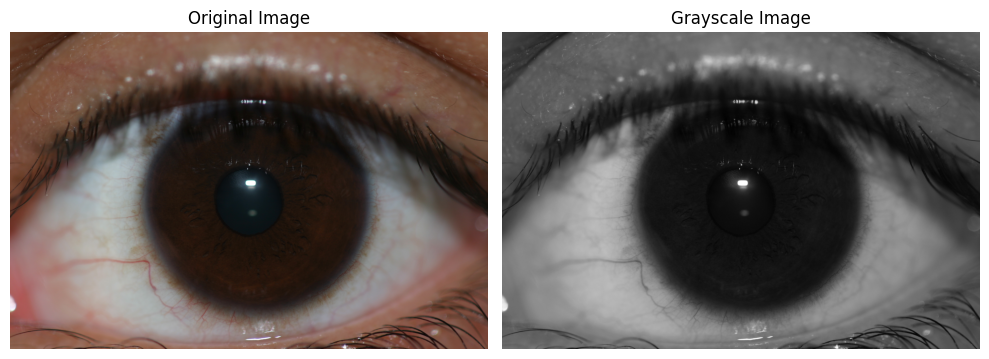

In [48]:
gray = segmentation.to_grayscale()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(segmentation.img_array)
plt.title("Original Image")
plt.axis('off')
    
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.tight_layout()
plt.show()

## Iris and pupil boundaries detection

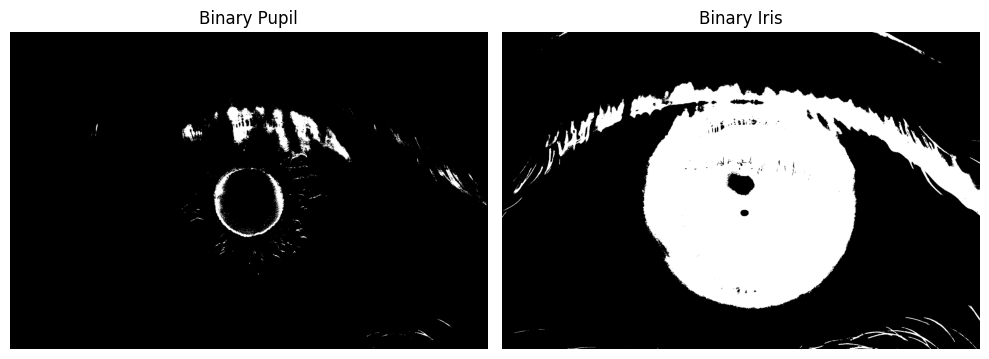

Pupil center: (1019, 726), Pupil radius: 154
Iris radius: 499.0


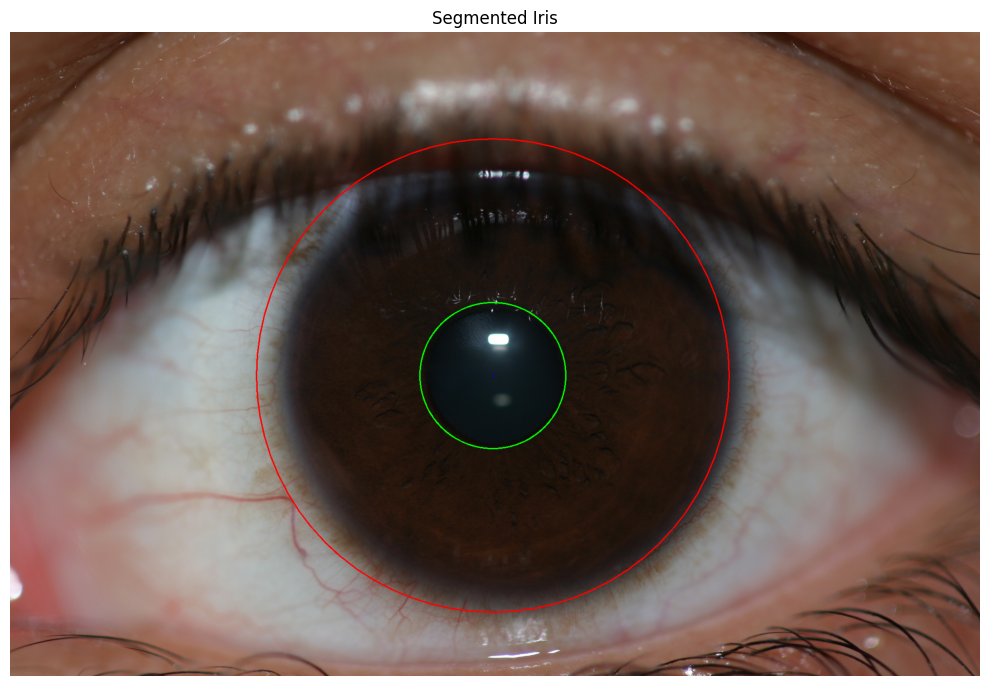

In [49]:
iris_threshold, pupil_threshold = segmentation.compute_threshold(X_I=2.2, X_P=5.3)

# Binarize for pupil detection
binary_pupil = segmentation.binarize_pupil(pupil_threshold)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_pupil, cmap='gray')
plt.title("Binary Pupil")
plt.axis('off')
    
# Binarize for iris detection
binary_iris = segmentation.binarize_iris(iris_threshold)
plt.subplot(1, 2, 2)
plt.imshow(binary_iris, cmap='gray')
plt.title("Binary Iris")
plt.axis('off')
plt.tight_layout()
plt.show()
    
# Detect pupil
pupil_center, pupil_radius = segmentation.detect_pupil()
print(f"Pupil center: {pupil_center}, Pupil radius: {pupil_radius}")
    
# Detect iris
_, iris_radius = segmentation.detect_iris()
print(f"Iris radius: {iris_radius}")
    
# Visualize segmentation
segmented = segmentation.visualize_segmentation()
plt.figure(figsize=(10, 10))
plt.imshow(segmented)
plt.title("Segmented Iris")
plt.axis('off')
plt.tight_layout()
plt.show()


## Unwrapping the iris

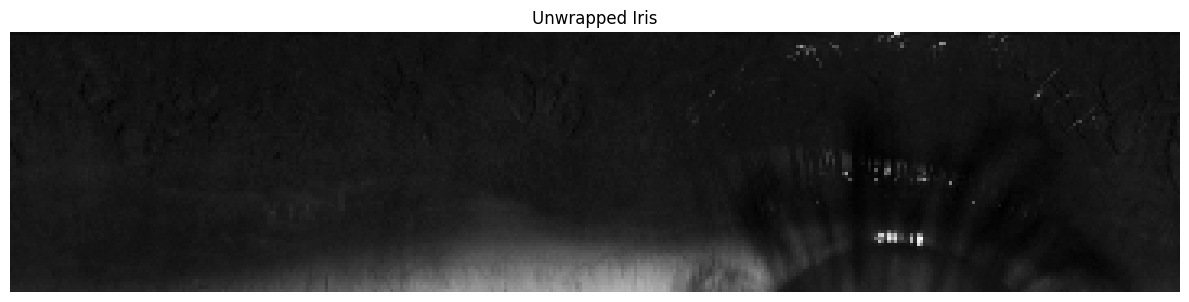

In [50]:
# Unwrap iris
unwrapped = segmentation.unwrap_iris()
plt.figure(figsize=(12, 4))
plt.imshow(unwrapped, cmap='gray')
plt.title("Unwrapped Iris")
plt.axis('off')
plt.tight_layout()
plt.show()

## Generating Iris code

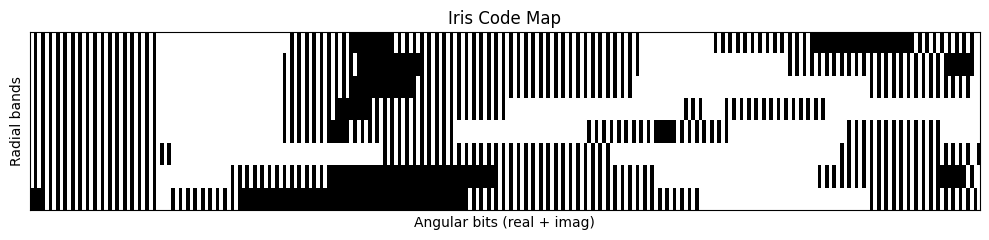

In [51]:
iris_code = segmentation.generate_iris_code()
segmentation.visualize_iris_code()

## Comparing iris codes (Iris Detection)

In [52]:
path1 = "data/041/IMG_041_L_3.JPG"
path2 = "data/041/IMG_041_R_6.JPG"

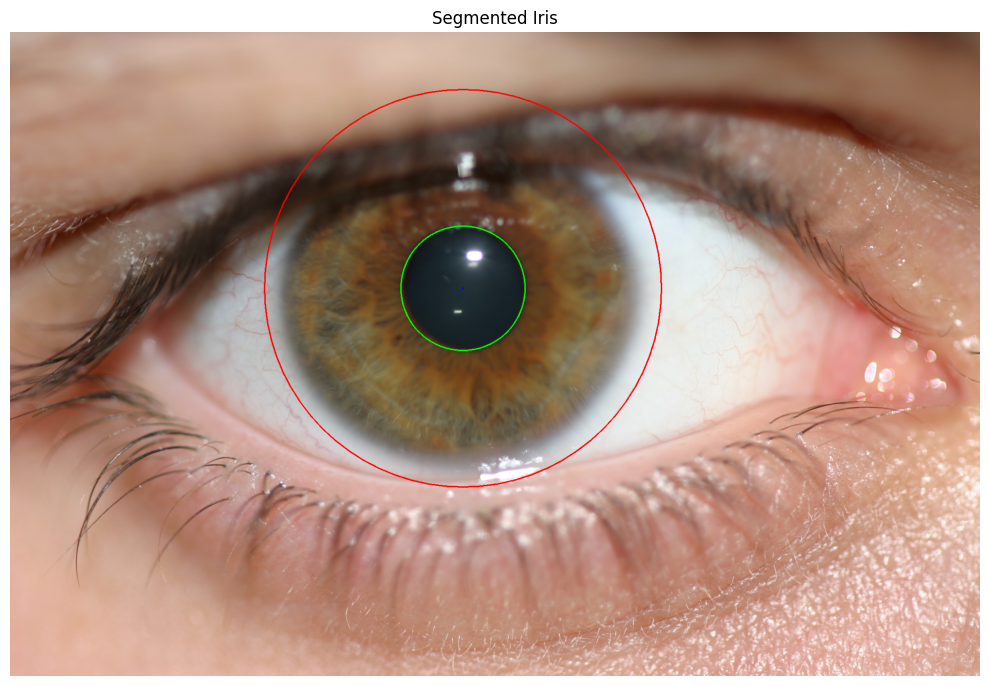

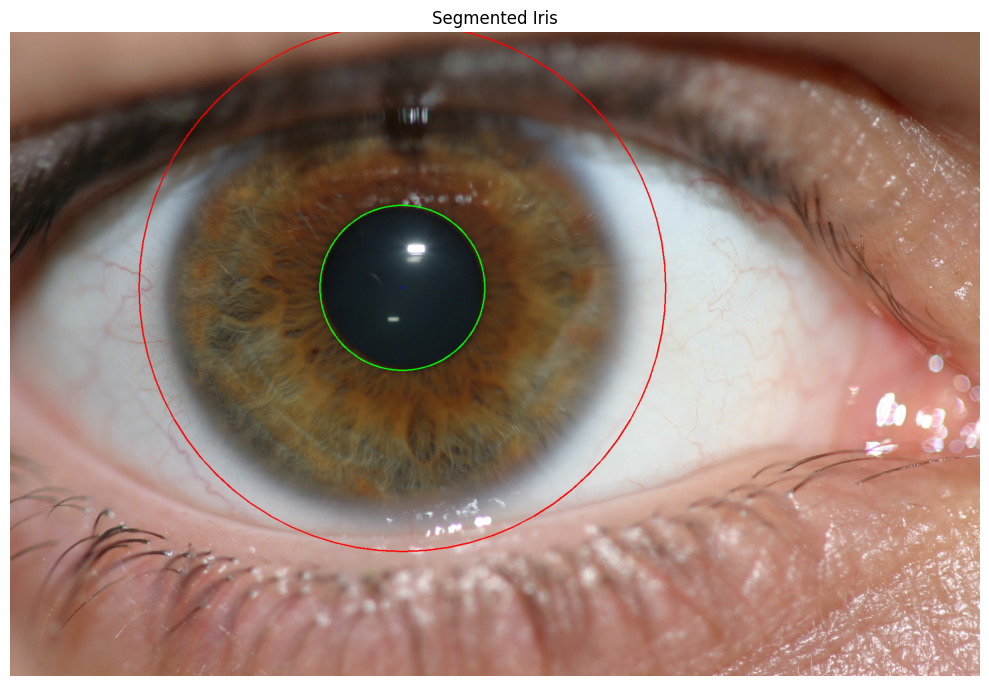

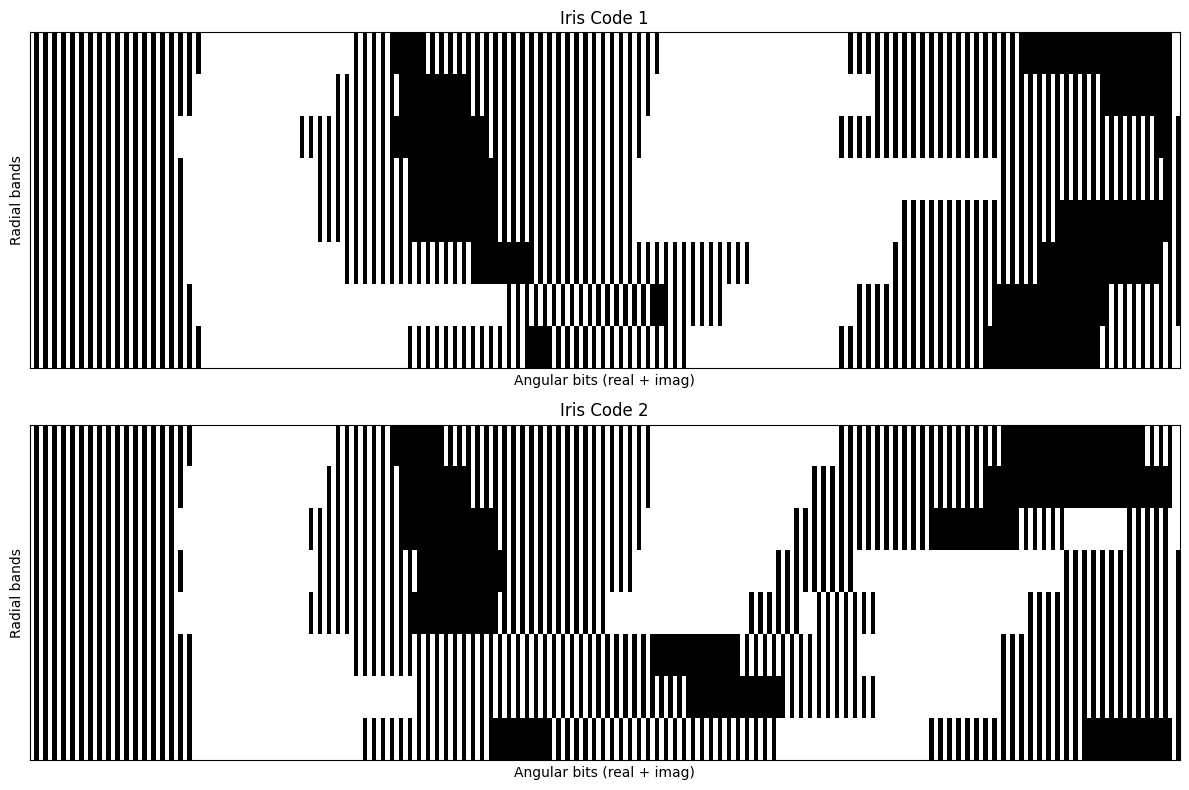

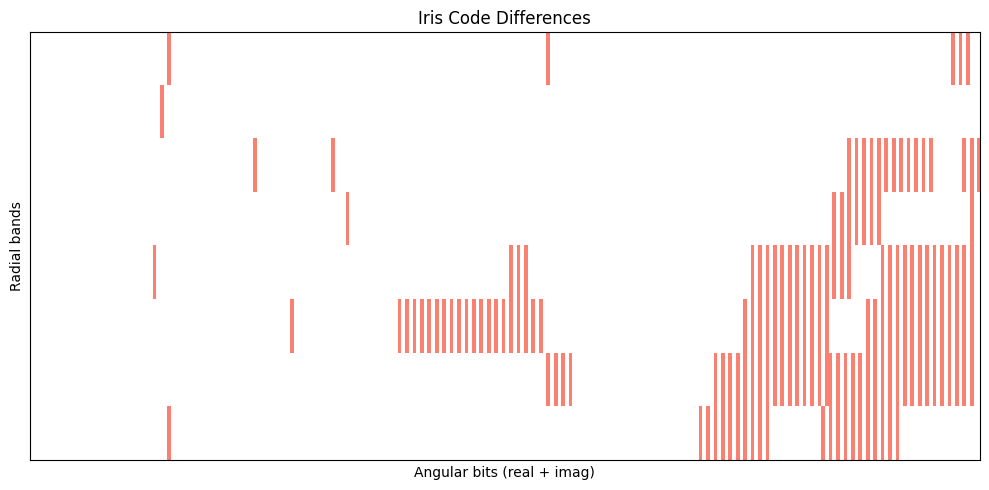

Hamming distance: 0.1748046875
Iris codes are similar.


In [57]:
segmenter = IrisSegmenter()
segmentation1 = segmenter.prep(IrisSegmentation(path1), X_I=2.3, X_P=4.2)
segmentation2 = segmenter.prep(IrisSegmentation(path2), X_I=2.2, X_P=4.2)

iris_code1 = segmentation1.generate_iris_code()
iris_code2 = segmentation2.generate_iris_code()

segmenter.compare_iris_codes(segmentation1, iris_code1, iris_code2)

## Comparing different eyes

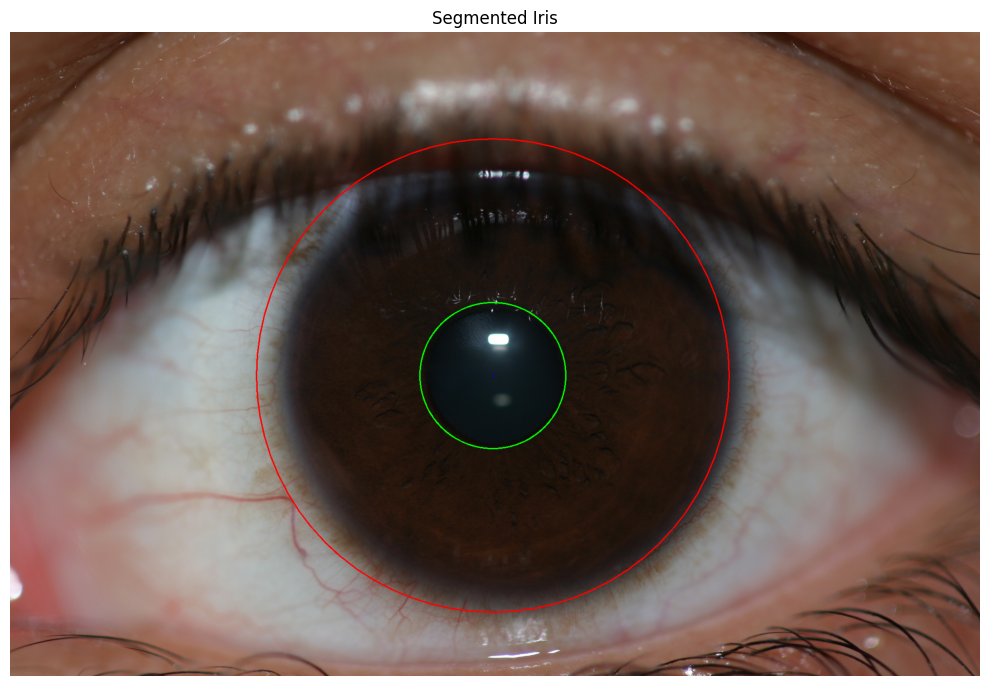

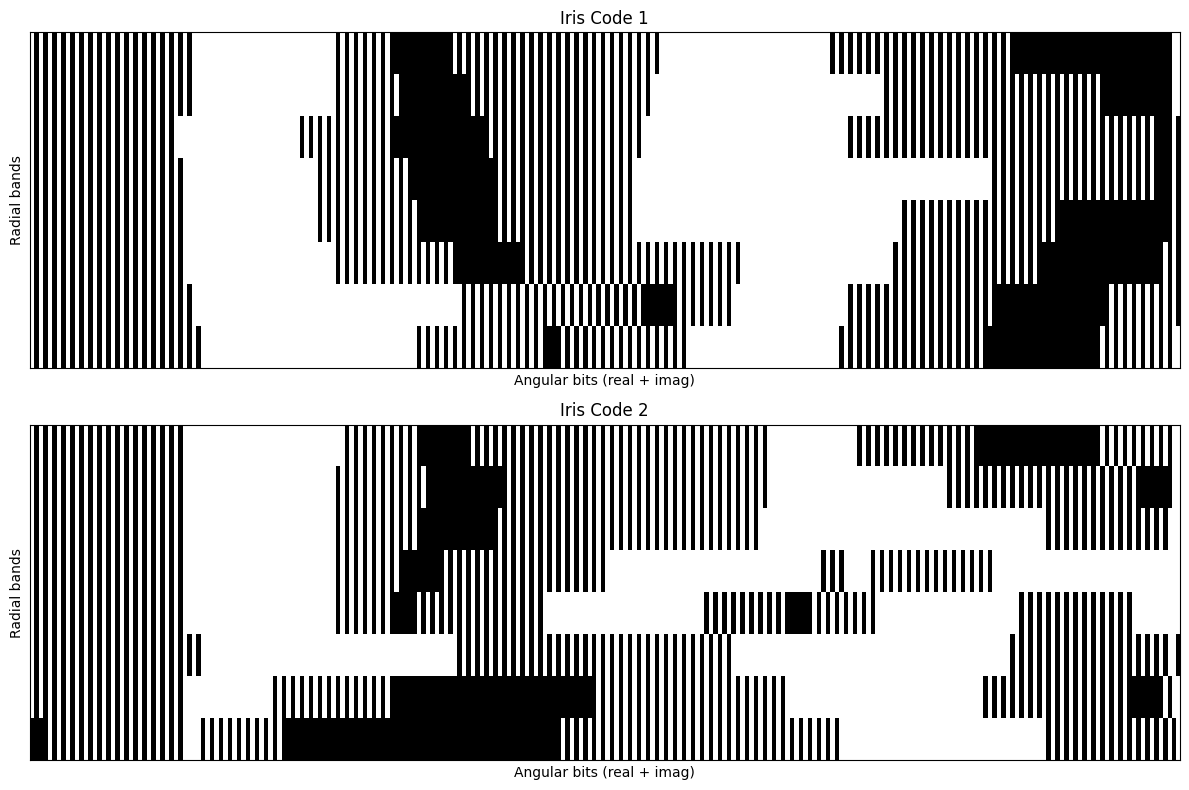

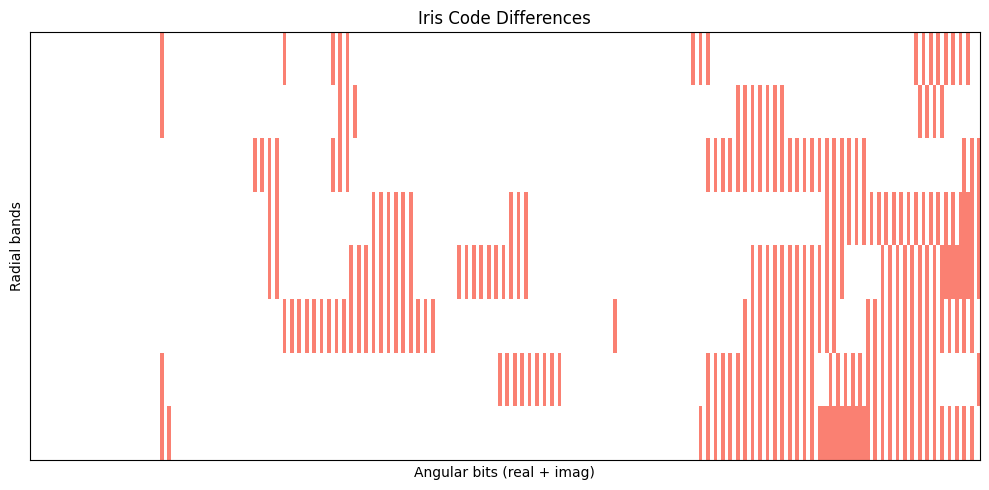

Hamming distance: 0.255859375
Iris codes are different.


In [54]:
segmentation3 = segmenter.prep(IrisSegmentation(image_path), X_I=2.2, X_P=5.3)
iris_code3 = segmentation3.generate_iris_code()
segmenter.compare_iris_codes(segmentation1, iris_code1, iris_code3)